# **A Mathematical Representation of Historical Greenhouse Gas Emissions with Rigorous Insights**

**Rizal Purnawan**\
ORCID: [0000-0001-8858-4036](https://orcid.org/0000-0001-8858-4036)

This notebook is the computational platform of our paper entitled ***A Mathematical Representation of Historical Greenhouse Gas Emissions with Rigorous Insights***.

## **1. Introduction**

In this notebook, we will implement the mathematical theory developed in the paper and analyse the historical greenhouse gas (GHG) emissions on the dataset by provided by [[1]](https://doi.org/10.5281/zenodo.10006301). The data cleansing is performed in this notebook. We will also develop the necessary algorithms for the computations. Our aim will be obtaining the following insights from the dataset:
1. The historical upper bound emission (HUBE) for each country and each GHG type.
2. The historical peak emission (HPE) for each country and each GHG type.
3. The pivotal period (piviod) for each country and each GHG type.
4. The historical expected growth rate (HEGR) of emission for each country and each GHG type.
5. The conditional HEGR of emission for each country and each GHG type.
6. The historical lower bound transformation (HLBT) and the historical upper bound transformation (HUBT) of the contunuous emission process.

## **2. Data Extraction and Cleansing**

### **2.1. Extracting the Dataset**

The dataset is downloaded from the source [[1]](https://doi.org/10.5281/zenodo.10006301), and it displayed as follows:

In [1]:
# Libraries:
import inspect
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use("seaborn-v0_8-white")
from sklearn.linear_model import LinearRegression

In [2]:
# Displaying the dataset:
path = r"D:\Rizal Purnawan\Programming Languages\Python\Datasets\Guetschow_et_al_2023b-PRIMAP-hist_v2.5_final_15-Oct-2023.csv"
df = pd.read_csv(path)

def narrative(nar):
    print("\n" + nar)
    print("-" *len(nar))

narrative("The first 5 rows of the dataset")
display(df.head())

narrative("The last 5 rows of the dataset")
display(df.tail())


The first 5 rows of the dataset
-------------------------------


,source,scenario (PRIMAP-hist),provenance,area (ISO3),entity,unit,category (IPCC2006_PRIMAP),1750,1751,1752,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,PRIMAP-hist_v2.5_final,HISTCR,measured,ABW,CH4,CH4 * gigagram / a,1,0.00564,0.00567,0.00571,...,1.1600,1.1300,1.0900,1.0500,1.0100,0.9870,0.9570,0.9150,0.8930,0.8780
1,PRIMAP-hist_v2.5_final,HISTCR,measured,ABW,CH4,CH4 * gigagram / a,1.A,0.00564,0.00567,0.00571,...,0.1400,0.1400,0.1350,0.1300,0.1260,0.1320,0.1320,0.1200,0.1310,0.1360
2,PRIMAP-hist_v2.5_final,HISTCR,measured,ABW,CH4,CH4 * gigagram / a,1.B,0.00000,0.00000,0.00000,...,1.0200,0.9880,0.9560,0.9200,0.8880,0.8560,0.8250,0.7950,0.7620,0.7420
3,PRIMAP-hist_v2.5_final,HISTCR,measured,ABW,CH4,CH4 * gigagram / a,1.B.1,0.00000,0.00000,0.00000,...,0.0592,0.0635,0.0654,0.0619,0.0635,0.0643,0.0674,0.0703,0.0703,0.0837
4,PRIMAP-hist_v2.5_final,HISTCR,measured,ABW,CH4,CH4 * gigagram / a,1.B.2,0.00000,0.00000,0.00000,...,0.9570,0.9240,0.8910,0.8580,0.8250,0.7910,0.7580,0.7250,0.6920,0.6580



The last 5 rows of the dataset
------------------------------


,source,scenario (PRIMAP-hist),provenance,area (ISO3),entity,unit,category (IPCC2006_PRIMAP),1750,1751,1752,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
45901,PRIMAP-hist_v2.5_final,HISTTP,measured,ZWE,N2O,N2O * gigagram / a,M.AG.ELV,0.0865,0.0881,0.0896,...,16.4,14.3,15.8,14.3,15.0,15.1,15.0,13.4,13.9,13.7
45902,PRIMAP-hist_v2.5_final,HISTTP,measured,ZWE,PFCS (AR4GWP100),CO2 * gigagram / a,2,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45903,PRIMAP-hist_v2.5_final,HISTTP,measured,ZWE,PFCS (AR4GWP100),CO2 * gigagram / a,M.0.EL,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45904,PRIMAP-hist_v2.5_final,HISTTP,measured,ZWE,SF6,SF6 * gigagram / a,2,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45905,PRIMAP-hist_v2.5_final,HISTTP,measured,ZWE,SF6,SF6 * gigagram / a,M.0.EL,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **2.2. Cleansing the Dataset**

We will filter the dataset based on several considerations as follows:
1. The GHG types to be included are CO2, CH4, N2O, FH3 and SF6. Hence we will filter the column `entity` based on these arguments.
2. There are arguments that are not countries in column `area (ISO3)`, including regions, etc. The values in the column to be used will only be countries. We have another dataset to filter this dataset.
3. The units in use take the form "\<GHG type> *gigagram / a", which means "gigagram/annum" of the GHG type. Hence, we will transform the data into equivalent values in tons/year and we delete the column.
4. According to [[1]](https://doi.org/10.5281/zenodo.10006301), column `category (IPCC2006_PRIMAP)` indicates the cause of emissions. And the argument `M.0.EL` accounts the sum of emissions from all causes. Hence we will filter the column with the chosen argument `M.0.EL`, and then drop the column.
5. We will also drop the columns `source`, `scenario (PRIMAP-hist)` and `provenance`.
6. We will transform the structure of the data such that the number of years are not as columns, but there is a column containing the years of records.

According to these considerations, the data is preprocessed as follows:

In [3]:
# Countries dataset:
countries_path = r"D:\Rizal Purnawan\Programming Languages\Python\Datasets\Metadata_Country.csv"
countries_df = pd.read_csv(countries_path)

# Cleansing countries dataset:
def cleanse_countries():
    # Countries in use will countries in both `countries_df` and `df`:
    countries = list(set(countries_df["Country Code"]).intersection(set(df["area (ISO3)"])))
    countries.remove("LDC")     # <-- LDC means Least Developed Country (UN classification),
                                # which is not a country
    countries = sorted(countries)
    dat = countries_df.copy()
    dat = dat[(dat["Country Code"].isin(countries))]
    dat = dat.reset_index(drop= True)
    dat = pd.DataFrame(dat, columns= ["Country Code", "TableName"])
    dat.columns = ["Country", "Country Name"]
    return dat

cl_cou = cleanse_countries()

# Convenient algorithm:
def country_caller(code):
    df = cl_cou.copy()
    return df[df["Country"] == code]["Country Name"]

narrative("The first 5 rows of countries dataset:")
display(cl_cou.head())

narrative("The last 5 rows of countries dataset:")
display(cl_cou.tail())


The first 5 rows of countries dataset:
--------------------------------------


,Country,Country Name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra



The last 5 rows of countries dataset:
-------------------------------------


,Country,Country Name
193,WSM,Samoa
194,YEM,"Yemen, Rep."
195,ZAF,South Africa
196,ZMB,Zambia
197,ZWE,Zimbabwe


In [4]:
# Cleansing Emission Dataset:
def cleanse_emission():
    df_em = df.copy()

    # We use only emission with category 'M.0.EL':
    df_em = df_em[(df_em["category (IPCC2006_PRIMAP)"] == "M.0.EL")]
    df_em = df_em.drop("category (IPCC2006_PRIMAP)", axis= 1)
    df_em = df_em.reset_index(drop= True)

    # We will drop column 'unit', and later transform the unit in metric tons/year:
    df_em = df_em.drop(columns= list(df_em.columns[:3]) + ["unit"])

    # Temporarily tidying the dataset up:
    df_em.columns = ["Country", "Gas"] + list(df_em.columns[2:])

    # Dictionary of each coutries and their green house gases time series:
    def emission_by_country():
        dic = dict()
        years = range(1750, 2022 + 1)
        for c in df_em["Country"].unique():
            df = df_em[(df_em["Country"] ==  c)].drop("Country", axis= 1).copy()
            df = df.drop_duplicates()
            fil_row = list()
            for gas in df_em["Gas"].unique():
                gas_df = df[df["Gas"] == gas].copy()
                try:
                    fil_row.append(list(gas_df.loc[gas_df.index[0], :]))
                except:
                    pass
            df = pd.DataFrame(
                fil_row, columns= df.columns
            )
            gases = list(df["Gas"])
            df = df.drop("Gas", axis= 1)
            df = df.T.copy()
            df = df.reset_index(drop= True)
            df.columns = gases
            df["Year"] = years
            df = pd.DataFrame(df, columns= ["Year"] + list(df.columns[:-1]))
            dic[c] = df
        return dic

    # New dataset with a more structured form:
    def new_emission_df():
        dfs = emission_by_country()
        dfs_list = list()
        for c in dfs.keys():
            df = dfs[c].copy()
            df["Country"] = [c] *len(df)
            df = pd.DataFrame(df, columns= ["Country"] + list(df.columns[:-1]))
            dfs_list.append(df)
        new_df = pd.concat(dfs_list, axis= 0)
        new_df = new_df.fillna(0)
        new_df = new_df.reset_index(drop= True)
        return new_df

    output_df = new_emission_df().copy()
    output_df = output_df.fillna(0)
    output_df = pd.DataFrame(
        output_df, columns= ["Country", "Year", "CH4", "CO2", "N2O", "NF3", "SF6"]
        )
    output_df = output_df[(output_df["Country"].isin(cl_cou["Country"]))]
    output_df = output_df.reset_index(drop= True)

    # Converting the unit to metric tons per annum:
    for col in output_df.columns[2:]:
        output_df[col] = [1000 *x for x in output_df[col]]
        
    return output_df

# Instantiating the cleansed dataset:
cl_em = cleanse_emission().copy()

In [5]:
# Displaying the cleanse emission dataset:
narrative("The first 5 rows of emission dataset (in metric tons/year)")
display(cl_em.head())

narrative("The last 5 rows of emission dataset (in metric tons/year)")
display(cl_em.tail())


The first 5 rows of emission dataset (in metric tons/year)
----------------------------------------------------------


,Country,Year,CH4,CO2,N2O,NF3,SF6
0,ABW,1750,13.0,0.0,0.0501,0.0,0.0
1,ABW,1751,13.1,0.0,0.0562,0.0,0.0
2,ABW,1752,13.2,0.0,0.0622,0.0,0.0
3,ABW,1753,13.3,0.0,0.0682,0.0,0.0
4,ABW,1754,13.4,0.0,0.0742,0.0,0.0



The last 5 rows of emission dataset (in metric tons/year)
---------------------------------------------------------


,Country,Year,CH4,CO2,N2O,NF3,SF6
54049,ZWE,2018,443000.0,10800000.0,20800.0,0.0,0.0
54050,ZWE,2019,443000.0,10600000.0,20800.0,0.0,0.0
54051,ZWE,2020,370000.0,9930000.0,18900.0,0.0,0.0
54052,ZWE,2021,411000.0,10900000.0,19600.0,0.0,0.0
54053,ZWE,2022,407000.0,11100000.0,18800.0,0.0,0.0


### **2.3. Visualizing the Cleansed Dataset**

In [6]:
# Top countries by expected GHGs emissions:
all_countries = [c for c in list(cl_cou["Country"]) if c in list(cl_em["Country"])]

def countries_with_total_emission():
    df = cl_em.copy()
    ghg = list(df.columns[2:])
    countries = list(df["Country"].unique())
    exp_ghg_list = [
        [df[df["Country"] == c][g].sum() for c in countries]
        for g in ghg
    ]
    out_dic = {"Country": countries}
    for k, g in zip(range(len(ghg)), ghg):
        out_dic[g] = exp_ghg_list[k]
    return pd.DataFrame(out_dic)

def top_countries_by_emission(n= 10):
    df = countries_with_total_emission().copy()
    ghg = list(df.columns[1:])
    ghg_rank = {
        g: list(df.sort_values(by= [g], ascending= False)["Country"])[:n]
        for g in ghg
    }
    return ghg_rank

def top_emission_plot(
        n= 10, vertical= True, figsize= None,
        cmap= "cool", linewidth= 1.2, marker= None,
        wspace= 0.2, hspace= 0.3,
        legend_loc= "upper left",
        title= None, title_y= 0.92,
        title_weight= "bold", title_size= 12,
        savefig= False
        ):
    df = cl_em.copy()
    params = top_countries_by_emission(n)
    ghg = params.keys()
    m = len(ghg)
    
    df_dic = dict()
    for g in ghg:
        dfg = df.loc[:, ["Country", "Year", g]].copy()
        df_year = pd.Series(dfg["Year"].unique())
        dfg_list = [df_year]
        for c in params[g]:
            df_temp = dfg[(dfg["Country"] == c)][g].copy()
            df_temp = df_temp.reset_index(drop= True)
            dfg_list.append(df_temp)
        df_out = pd.concat(dfg_list, axis= 1, ignore_index= True)
        df_out.columns = ["Year"] + params[g]
        df_dic[g] = df_out.copy()
        
    if vertical == True:
        nrows, ncols = m, 1
    else:
        nrows, ncols = 1, m
    fig, axs = plt.subplots(nrows= nrows, ncols= ncols, figsize= figsize)
    for k, g in zip(range(m), ghg):
        fig = df_dic[g].set_index("Year").plot(
            ax= axs[k],
            ylabel= f"Tons of {g} per annum",
            title= f"Emissions of {g}",
            cmap= cmap, marker= marker
        )
        axs[k].legend(loc= legend_loc)
    fig = plt.subplots_adjust(wspace= wspace, hspace= hspace)
    fig = plt.suptitle(
        title, y= title_y, weight= title_weight, fontsize= title_size
    )
    if savefig == True:
        fig_title = input(str("Type the figure name (without extension): "))
        fig_title = fig_title + ".png"
        fig = plt.savefig(fig_title)
    fig = plt.show()

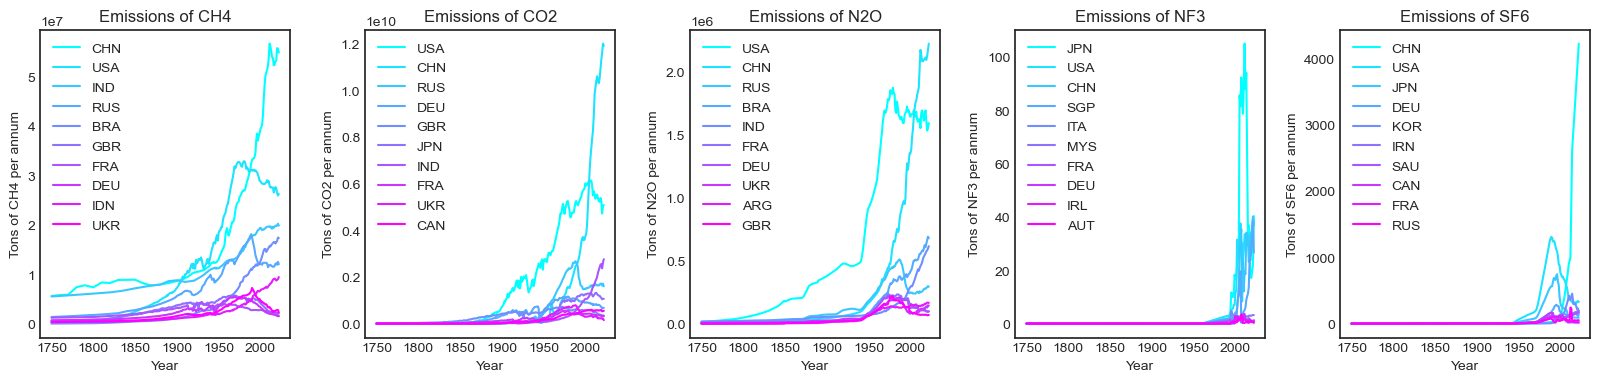

In [7]:
# Displaying top 10 countries by GHG emissions:
top_emission_plot(
    vertical= False,
    figsize= (5 *4, 4),
    wspace= 0.3,
    title_y= 0.98
)

## **3. Development of the Algorithms for the Continuous Emission Process and Its Properties**

As stated in the paper, we will use machine learning models to determine the constants $a_{c, g, 0}, a_{c, g, 1}, \dotsc, a_{c, g, p} \in \mathbb{R}$, for every $c \in C$ and $g \in G$. The models will be built using `LinearRegression` from `sklearn.linear_model`. The weights of the models will represent $a_{c, g, 0}, a_{c, g, 1}, \dotsc, a_{c, g, p}$. We also leverage the power of computer algebra system (CAS) by using `sympy` library for symbolic mathematical operations.

We also develop the algorithms representing the evalutaion of the properties of the CEP as explained in section 3.4 in the paper. The scirpt of the algorithms are created as a Python class in a Python module `greenhouse_emission` in this directory. The module is imported in the following cell:

In [8]:
from greenhouse_emission import GreenhouseEmissionModel

### **3.1. Tutorial Using `GreenhouseEmissionModel`**

In this subsection, we present the tutorial in using the algorithms within the class `GreenhouseEmissionModel` from `greenhouse_emission` module. The source code can be accessed in the Python script of `greenhouse_emission` in the same directory with this notebook.

As an example, we will construct the continuous emission process (CEP) of Indonesia (IDN) regarding the CH4 historical emission.

#### 3.1.1. Instantiation

First, let us instance the class as follows:

In [9]:
ge_model = GreenhouseEmissionModel(cl_em)

#### 3.1.2. Computing CEP

Note that the argument `cl_em` in the class above is the cleansed dataset of historical GHE. Then the CEP of Indonesia with CH4 is computed as follows:

In [10]:
X_idn_ch4 = ge_model.cep_function(
    "IDN",      # <-- Country code
    "CH4",      # <-- GHG type
    w= 5,       # <-- The value of w
    n= 50       # <-- Estimated maximum polynomial degree
)

The instance `X_idn_ch4` is the representation of the CEP of Indonesia with CH4. It is a Python class with an input time $t \in T$. The instance `X_idn_ch4` is the representation of the function $X_{\mathrm{IDN}, \mathrm{CH4}}: T \to \mathbb{R}$. For an early verification, let us visualize `X_idn_ch4` along with the actual emission values in the following cell:

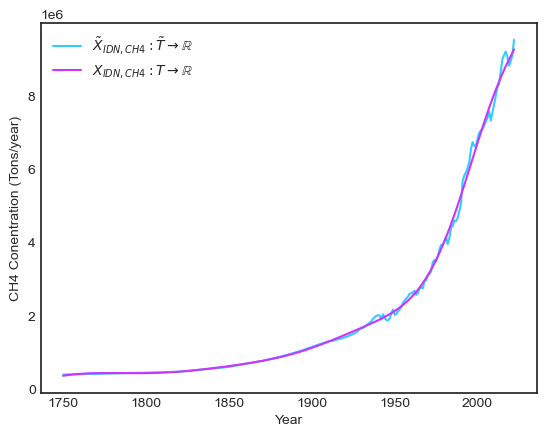

In [11]:
# Visualizing X_idn_ch4:
def visalize_cep(figsize= None):
    # We can use the method '.ghg_country_filter' in 'GreenhouseEmissionModel'
    # to filter the cleansed dataset:
    df = ge_model.ghg_country_filter("IDN", "CH4").copy()

    # Implementation of 'X_idn_ch4':
    df["X_IDN_CH4"] = [X_idn_ch4(t) for t in df["Year"]]

    # Visualization:
    fig = plt.figure()
    fig = plt.plot(
        df["Year"], df["CH4"],
        label= r"$\tilde{X}_{IDN, CH4}: \tilde{T} \to \mathbb{R}$",
        color= plt.cm.cool(0.2)
    )
    fig = plt.plot(
        df["Year"], df["X_IDN_CH4"],
        label= r"$X_{IDN, CH4}: T \to \mathbb{R}$",
        color= plt.cm.cool(0.8)
    )
    fig = plt.legend()
    fig = plt.xlabel("Year")
    fig = plt.ylabel("CH4 Conentration (Tons/year)")
    fig = plt.show()

visalize_cep()

#### 3.1.3. HUBE Period

Now we will evaluate the first property of the CEP, namely HUBE. We will use $\rho = 5$ years. And the HUBE is computed as follows:

In [12]:
print("HUBE Period:")
display(ge_model.hube(
    X_idn_ch4,
    rho= 5    # <-- The value of rho
    )
)

HUBE Period:


Interval.Lopen(2016.99999999975, 2022)

The result shows that the 10 years-period of HUBE of $X_{IDN, CH4}$ (the CEP of Indonesia with respect to the CH4 emission) was the recent times.

#### 3.1.4. HPE Period

Note that HPE period may not always exist for a CEP. Now let us evaluate the HPE period with $\rho = 5$ as follows:

In [13]:
print("HPE Period:")
display(ge_model.hpe(
    X_idn_ch4,
    5    # <-- The value of rho
    )
)

HPE Period:


None

It turns out that the HPE does not exists for $X_{IDN, CH4}$.

#### 3.1.5. RGE

Now we compute the rapid growing emission (RGE) of the CEP $X_{IDN, CH4}$ with $\rho = 5$.

In [14]:
ge_model.rge(X_idn_ch4, rho= 5)

{'time-RGE': 1996.4999999997758,
 '10.0-period-RGE': Interval.open(1991.49999999978, 2001.49999999978)}

The result shows thatthe 10 years-period of RGE $X_{IDN, CH4}$ was ruing the early-1990s to the early-2000s.

#### 3.1.6. RSE

Now we compute the rapid shrinking emission (RSE) of the CEP $X_{IDN, CH4}$ with $\rho = 5$.

In [15]:
ge_model.rse(X_idn_ch4, rho= 5)

{'time-RSE': None, '10.0-period-RSE': None}

From the result above, we have that the RSE of $X_{IDN, CH4}$ has not existed.

#### 3.1.7. Piviods

Now we compute the 10 years-inpiviods with $\rho = 5$ years as follows:

In [16]:
ge_model.piviods(X_idn_ch4, rho= 5)

{'10.0-inpiviod': Interval.open(1947.09600000000, 1957.09600000000),
 '10.0-depiviod': None}

The result shows that the inpiviod of $X_{IDN, CH4}$ was from the late-1940s to the late-1950s. Afterward, Indonesia have been growing rapid emission of CH4.

#### 3.1.8. HEGR

The historical expected growth rate (HEGR) of $X_{IDN, CH4}$ is presented as follows:

In [17]:
print("HEGR(X_idn_ch4) =", round(ge_model.hegr("IDN", "CH4"), 3), "Ton/year/year")

HEGR(X_idn_ch4) = 33544.118 Ton/year/year


#### 3.1.9. Conditional HEGR

Let us now evaluate the conditional HEGR from 1945 to 2022:

In [50]:
idn_ch4_chegr_1945_2022 = ge_model.conditional_hegr(
    "IDN", "CH4",
    list(range(1945, 2022 + 1))    # <-- Discrete year interval in Sympy interval
)

print(
    "HEGR(X_idn_ch4 | [1945, 2022]) =",
    round(idn_ch4_chegr_1945_2022, 3),
    "Ton/year/year"
)

HEGR(X_idn_ch4 | [1945, 2022]) = 99220.779 Ton/year/year


#### 3.1.10. HLBT

Now let us compute the historical lower bound transformation (HLBT). The resulting computation is a Python function, therefore, the our verification will be using a visualization. However, we will put the visualization along with the historical upper bound transformation, the CEP and the DEP. The computation of HLBT is presented as follows:

In [19]:
hlbt_idn_ch4 = ge_model.hlbt(
    X_idn_ch4,
    ge_model.dep_function("IDN", "CH4")  # <-- Computing the DEP
)

#### 3.1.11. HUBT

Likewise, we will now compute the historical upper bound transformation (HUBT) as follows:

In [20]:
hubt_idn_ch4 = ge_model.hubt(
    X_idn_ch4,
    ge_model.dep_function("IDN", "CH4")  # <-- Computing the DEP
)

#### 3.1.12. Visualization of HLBT and HUBT

The visualization of the HLBT and the HUBT of $X_{IDN, CH4}$ is presented as follows:

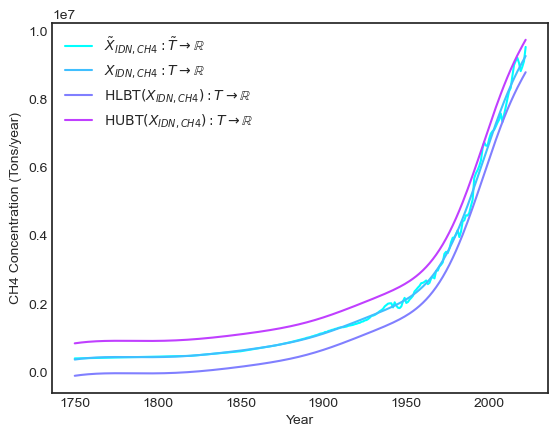

In [21]:
def vis_hlbt_hubt(figsize= None):
    df = ge_model.ghg_country_filter("IDN", "CH4").copy()
    df["X_IDN_CH4"] = [X_idn_ch4(t) for t in df["Year"]]
    df["HLBT"] = [hlbt_idn_ch4(t) for t in df["Year"]]
    df["HUBT"] = [hubt_idn_ch4(t) for t in df["Year"]]

    labels = [
        r"$\tilde{X}_{IDN, CH4}: \tilde{T} \to \mathbb{R}$",
        r"$X_{IDN, CH4}: T \to \mathbb{R}$",
        r"$\mathrm{HLBT}(X_{IDN, CH4}): T \to \mathbb{R}$",
        r"$\mathrm{HUBT}(X_{IDN, CH4}): T \to \mathbb{R}$"
    ]

    # Visualization:
    fig = plt.figure()
    for col, lab, k in zip(list(df.columns[1:]), labels, range(4)):
        fig = plt.plot(
            df["Year"], df[col],
            label= lab,
            color= plt.cm.cool(k / 4)
        )
        fig = plt.legend()
    fig = plt.xlabel("Year")
    fig = plt.ylabel("CH4 Concentration (Tons/year)")
    fig = plt.show()

vis_hlbt_hubt()

As we can see that the graph above is consistent with the statements in theorem 9.

## **4. Rigorous Analysis of Top 3 Countries**

We will now perform the rigorous analysis based on the theory and algorithms we have developed on top 3 countries for each GHG emission.

### **4.1. Algorithm for Iteration**

The following cell contains the algorithms necessary to perform iterative computations of CEPs and their properties.

In [22]:
class IterativeCEP:
    def __init__(
            self, top_countries, ghg,
            w= 5, rho_f= 10, rho= 5
            ):
        self.top_countries = top_countries
        self.ghg = ghg
        self.w = w
        self.rho_f = rho_f
        self.rho = rho

        self.list_DEPs = None
        self.list_CEPs = None
        self.list_HLBTs = None
        self.list_HUBTs = None
        self.insights = None
        self.bounds = None

    def compute_DEPs(self):
        self.list_DEPs = [
            ge_model.dep_function(c, self.ghg)
            for c in self.top_countries
        ]
        print(">>> DEPs have been computed []")
        
    def compute_CEPs(self, n= 100):
        self.list_CEPs = [
            ge_model.cep_function(
                c, self.ghg,
                w= self.w,
                n= n
            )
            for c in self.top_countries
        ]
        print(">>> CEPs have been computed []")

    def rigorous_insights(self):
        # Computing HUBE periods:
        hube_periods = [ge_model.hube(CEP, self.rho) for CEP in self.list_CEPs]
    
        # Computing HPE periods:
        hpe_periods = [ge_model.hpe(CEP, self.rho) for CEP in self.list_CEPs]
    
        # Computing Piviods:
        inpiviods = [
            ge_model.piviods(
                CEP, self.rho)[f"{float(2 *self.rho)}-inpiviod"]
            for CEP in self.list_CEPs
        ]
        depiviods = [
            ge_model.piviods(
                CEP, self.rho)[f"{float(2 *self.rho)}-depiviod"]
            for CEP in self.list_CEPs
        ]
    
        # Computing HEGR:
        hegrs = [ge_model.hegr(c, self.ghg) for c in self.top_countries]
    
        # The past decade HEGR:
        past_dec_hegr = [
            ge_model.conditional_hegr(
                c, self.ghg,
                list(range(2012, 2022 + 1))
            )
            for c in self.top_countries
        ]
    
        # Countries dataframes:
        bounds_list = [
            ge_model.ghg_country_filter(c, self.ghg)
            for c in self.top_countries
        ]
    
        # Computing HLBT:
        hlbt_functions = [
            ge_model.hlbt(CEP, DEP)
            for DEP, CEP in zip(self.list_DEPs, self.list_CEPs)
        ]
        self.list_HLBTs = hlbt_functions
        hlbt_list = [
            [hlbt(t) for t in range(1750, 2023)]
            for hlbt in hlbt_functions
        ]
    
        # Computing HUBT:
        hubt_functions = [
            ge_model.hubt(CEP, DEP)
            for DEP, CEP in zip(self.list_DEPs, self.list_CEPs)
        ]
        self.list_HUBTs = hubt_functions
        hubt_list = [
            [hubt(t) for t in range(1750, 2023)]
            for hubt in hubt_functions
        ]
    
        # Computing the numeric values of CEPs:
        for k in range(len(bounds_list)):
            bounds_list[k][f"X_{self.top_countries[k]}_ch4"] = [
                self.list_CEPs[k](t) for t in bounds_list[k]["Year"]
            ]
            bounds_list[k]["HLBT"] = hlbt_list[k]
            bounds_list[k]["HUBT"] = hubt_list[k]
    
        insights = pd.DataFrame(
            {
                "Countries": self.top_countries,
                "HUBE": hube_periods,
                "HPE": hpe_periods,
                "Inpiviod": inpiviods,
                "Depiviod": depiviods,
                "HEGR": hegrs,
                "HEGR of Past Decade": past_dec_hegr,
            }
        )

        self.insights = insights
        self.bounds = bounds_list

        print(">>> Rigorous insights have been computed []")

    def visualize(self, labels, figsize= None, savefig= False):
        fig, axs = plt.subplots(
            nrows= 1, ncols= len(self.bounds), figsize= figsize
        )
        for c, df, k, lab in zip(
                self.top_countries,
                self.bounds,
                range(len(self.bounds)),
                labels
                ):
            axs[k].plot(
                df["Year"], df[self.ghg],
                color= plt.cm.cool(0.2),
                label= lab[0]
            )
            axs[k].plot(
                df["Year"], df[f"X_{c}_ch4"],
                color= plt.cm.cool(0.4),
                label= lab[1]
            )
            axs[k].plot(
                df["Year"], df["HLBT"],
                color= plt.cm.cool(0.6),
                label= lab[2]
            )
            axs[k].plot(
                df["Year"], df["HUBT"],
                color= plt.cm.cool(0.8),
                label= lab[3]
            )
            axs[k].legend()
            axs[k].set(
                title= f"Bounds for {c}",
                xlabel= "Year",
                ylabel= "Tons/year"
            )
        if savefig == True:
            fig_title = str(input("Type the graph title (without extension): "))
            fig = plt.savefig(fig_title + ".png")
        fig = plt.show()

### **4.2. Top 3 of CH4 Emissions**

In [24]:
ch4_top = IterativeCEP(
    ["CHN", "USA", "IND"],  # <-- Top 3 Countries
    "CH4",                  # <-- GHG Type
    w= 3
)

In [25]:
# Iterative computations:
ch4_top.compute_DEPs()
ch4_top.compute_CEPs(n= 30)
ch4_top.rigorous_insights()

>>> DEPs have been computed []
>>> CEPs have been computed []
>>> Rigorous insights have been computed []


In [26]:
ch4_top.insights

,Countries,HUBE,HPE,Inpiviod,Depiviod,HEGR,HEGR of Past Decade
0,CHN,"Interval.Lopen(2012.29999999976, 2022)","Interval.Lopen(2012.29999999976, 2022)","Interval.open(1941.11200000000, 1951.11200000000)",None,180882.352941,-120000.0
1,USA,"Interval.open(1979.19999999979, 1989.19999999979)","Interval.open(1979.19999999979, 1989.19999999979)","Interval.open(1931.04800000000, 1941.04800000000)","Interval.open(1993.33600000000, 2003.33600000000)",95845.588235,-130000.0
2,IND,"Interval.Lopen(2016.99999999975, 2022)",None,"Interval.open(1942.20000000000, 1952.20000000000)",None,52573.529412,10000.0


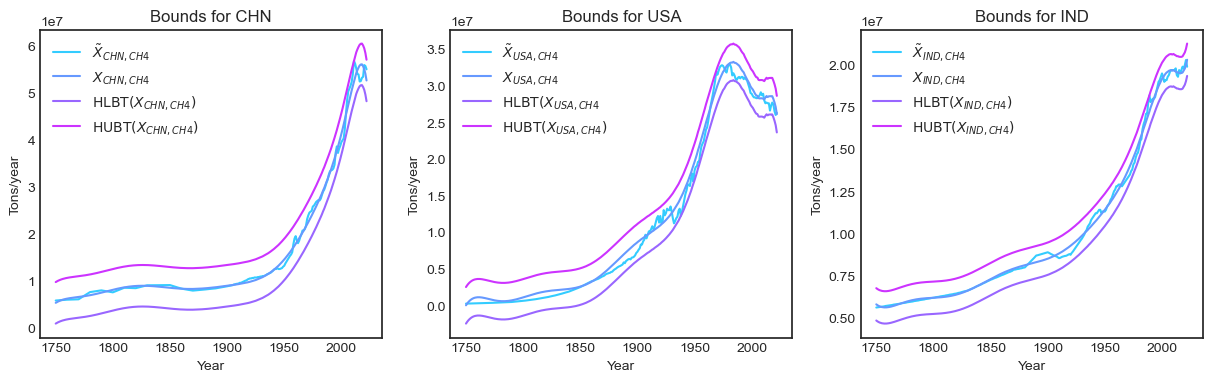

In [28]:
ch4_top.visualize(
    [
        [
            r"$\tilde{X}_{CHN, CH4}$", r"$X_{CHN, CH4}$",
            r"$\mathrm{HLBT}(X_{CHN, CH4})$", r"$\mathrm{HUBT}(X_{CHN, CH4})$"
        ],
        [
            r"$\tilde{X}_{USA, CH4}$", r"$X_{USA, CH4}$",
            r"$\mathrm{HLBT}(X_{USA, CH4}$", r"$\mathrm{HUBT}(X_{USA, CH4})$"
        ],
        [
            r"$\tilde{X}_{IND, CH4}$", r"$X_{IND, CH4}$",
            r"$\mathrm{HLBT}(X_{IND, CH4})$", r"$\mathrm{HUBT}(X_{IND, CH4})$"
        ]
    ],
    figsize= (15, 4)
)

### **4.3. Top 3 of CO2 Emissions**

In [29]:
co2_top = IterativeCEP(
    ["USA", "CHN", "RUS"], # <-- Top 3 Countries
    "CO2",                 # <-- GHG Type
    w= 3
)

In [30]:
# Iterative computations:
co2_top.compute_DEPs()
co2_top.compute_CEPs(n= 30)
co2_top.rigorous_insights()

>>> DEPs have been computed []
>>> CEPs have been computed []
>>> Rigorous insights have been computed []


In [31]:
co2_top.insights

,Countries,HUBE,HPE,Inpiviod,Depiviod,HEGR,HEGR of Past Decade
0,USA,"Interval.open(1998.89999999977, 2008.89999999977)","Interval.open(1998.89999999977, 2008.89999999977)","Interval.open(1909.56000000000, 1919.56000000000)",None,1.867647e+07,-27000000.0
1,CHN,"Interval.Lopen(2015.09999999975, 2022)","Interval.Lopen(2015.09999999975, 2022)","Interval.open(1977.56000000000, 1987.56000000000)",None,4.375000e+07,180000000.0
2,RUS,"Interval.open(1979.19999999979, 1989.19999999979)","Interval.open(1979.19999999979, 1989.19999999979)","Interval.open(1933.49600000000, 1943.49600000000)","Interval.open(1996.05600000000, 2006.05600000000)",5.882353e+06,-10000000.0


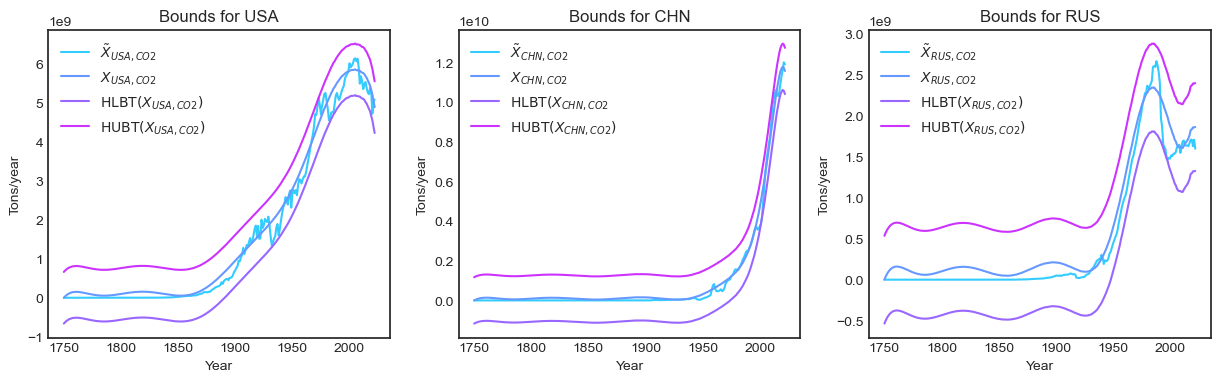

In [32]:
co2_top.visualize(
    [
        [
            r"$\tilde{X}_{USA, CO2}$", r"$X_{USA, CO2}$",
            r"$\mathrm{HLBT}(X_{USA, CO2})$", r"$\mathrm{HUBT}(X_{USA, CO2})$"
        ],
        [
            r"$\tilde{X}_{CHN, CO2}$", r"$X_{CHN, CO2}$",
            r"$\mathrm{HLBT}(X_{CHN, CO2}$", r"$\mathrm{HUBT}(X_{CHN, CO2})$"
        ],
        [
            r"$\tilde{X}_{RUS, CO2}$", r"$X_{RUS, CO2}$",
            r"$\mathrm{HLBT}(X_{RUS, CO2})$", r"$\mathrm{HUBT}(X_{RUS, CO2})$"
        ]
    ],
    figsize= (15, 4)
)

### **4.4. Top 3 of N2O Emissions**

In [33]:
n2o_top = IterativeCEP(
    ["USA", "CHN", "RUS"], # <-- Top 3 Countries
    "N2O",                 # <-- GHG Type
    w= 3
)

In [34]:
# Iterative computations:
n2o_top.compute_DEPs()
n2o_top.compute_CEPs(n= 30)
n2o_top.rigorous_insights()

>>> DEPs have been computed []
>>> CEPs have been computed []
>>> Rigorous insights have been computed []


In [35]:
n2o_top.insights

,Countries,HUBE,HPE,Inpiviod,Depiviod,HEGR,HEGR of Past Decade
0,USA,"Interval.open(1978.69999999979, 1988.69999999979)","Interval.open(1978.69999999979, 1988.69999999979)","Interval.open(1926.15200000000, 1936.15200000000)","Interval.open(1989.52800000000, 1999.52800000000)",5804.411765,4000.0
1,CHN,"Interval.Lopen(2013.59999999976, 2022)","Interval.Lopen(2013.59999999976, 2022)","Interval.open(1948.72800000000, 1958.72800000000)",None,8139.411765,5000.0
2,RUS,"Interval.open(1976.99999999979, 1986.99999999979)","Interval.open(1976.99999999979, 1986.99999999979)","Interval.open(1935.12800000000, 1945.12800000000)","Interval.open(1999.59200000000, 2009.59200000000)",1017.647059,4600.0


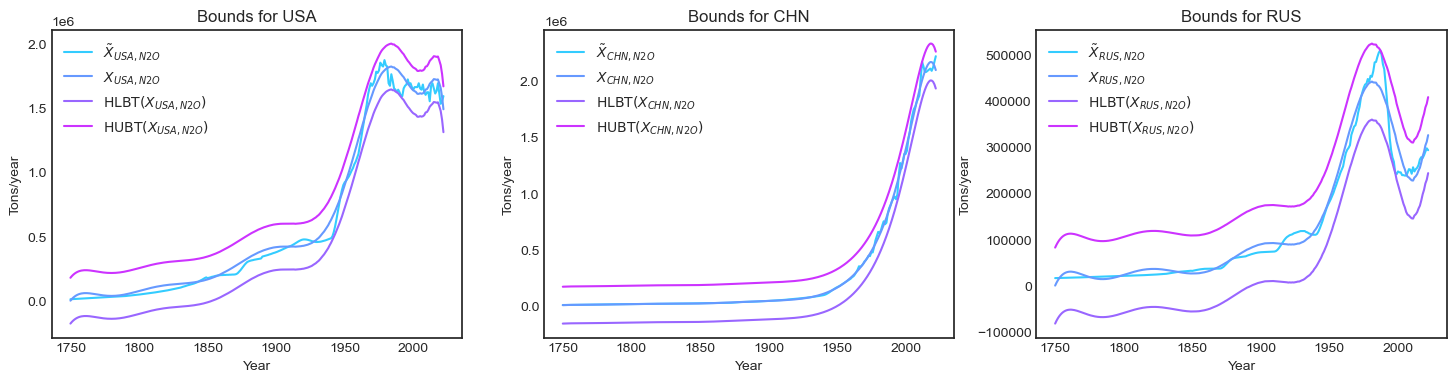

In [36]:
n2o_top.visualize(
    [
        [
            r"$\tilde{X}_{USA, N2O}$", r"$X_{USA, N2O}$",
            r"$\mathrm{HLBT}(X_{USA, N2O})$", r"$\mathrm{HUBT}(X_{USA, N2O})$"
        ],
        [
            r"$\tilde{X}_{CHN, N2O}$", r"$X_{CHN, N2O}$",
            r"$\mathrm{HLBT}(X_{CHN, N2O}$", r"$\mathrm{HUBT}(X_{CHN, N2O})$"
        ],
        [
            r"$\tilde{X}_{RUS, N2O}$", r"$X_{RUS, N2O}$",
            r"$\mathrm{HLBT}(X_{RUS, N2O})$", r"$\mathrm{HUBT}(X_{RUS, N2O})$"
        ]
    ],
    figsize= (18, 4)
)

### **4.5. Top 3 of NF3 Emissions**

In [37]:
nf3_top = IterativeCEP(
    ["JPN", "USA", "CHN"], # <-- Top 3 Countries
    "NF3",                 # <-- GHG Type
    w= 3
)

In [38]:
# Iterative computations:
nf3_top.compute_DEPs()
nf3_top.compute_CEPs(n= 50)
nf3_top.rigorous_insights()

>>> DEPs have been computed []
>>> CEPs have been computed []
>>> Rigorous insights have been computed []


In [39]:
nf3_top.insights

,Countries,HUBE,HPE,Inpiviod,Depiviod,HEGR,HEGR of Past Decade
0,JPN,"Interval.open(2006.99999999976, 2016.99999999976)","Interval.open(2006.99999999976, 2016.99999999976)","Interval.open(1979.73600000000, 1989.73600000000)",None,0.148162,-4.76
1,USA,"Interval.Lopen(2016.99999999975, 2022)",None,"Interval.open(1975.92800000000, 1985.92800000000)",None,0.134926,0.31
2,CHN,"Interval.Lopen(2016.99999999975, 2022)",None,"Interval.open(1981.64000000000, 1991.64000000000)",None,0.138603,1.92


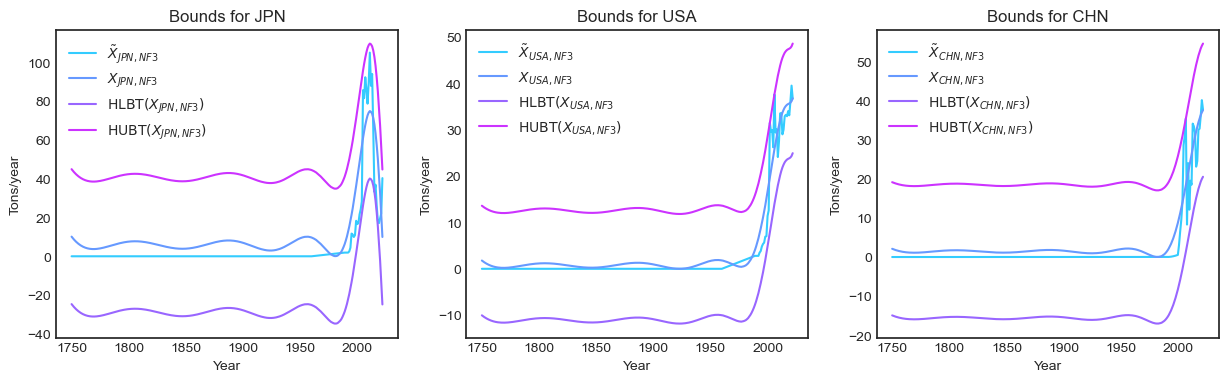

In [40]:
nf3_top.visualize(
    [
        [
            r"$\tilde{X}_{JPN, NF3}$", r"$X_{JPN, NF3}$",
            r"$\mathrm{HLBT}(X_{JPN, NF3})$", r"$\mathrm{HUBT}(X_{JPN, NF3})$"
        ],
        [
            r"$\tilde{X}_{USA, NF3}$", r"$X_{USA, NF3}$",
            r"$\mathrm{HLBT}(X_{USA, NF3}$", r"$\mathrm{HUBT}(X_{USA, NF3})$"
        ],
        [
            r"$\tilde{X}_{CHN, NF3}$", r"$X_{CHN, NF3}$",
            r"$\mathrm{HLBT}(X_{CHN, NF3})$", r"$\mathrm{HUBT}(X_{CHN, NF3})$"
        ]
    ],
    figsize= (15, 4)
)

### **4.6. Top 3 of SF6 Emissions**

In [41]:
sf6_top = IterativeCEP(
    ["CHN", "USA", "JPN"], # <-- Top 3 Countries
    "SF6",                 # <-- GHG Type
    w= 3
)

In [42]:
# Iterative computations:
sf6_top.compute_DEPs()
sf6_top.compute_CEPs(n= 50)
sf6_top.rigorous_insights()

>>> DEPs have been computed []
>>> CEPs have been computed []
>>> Rigorous insights have been computed []


In [43]:
sf6_top.insights

,Countries,HUBE,HPE,Inpiviod,Depiviod,HEGR,HEGR of Past Decade
0,CHN,"Interval.Lopen(2016.99999999975, 2022)",None,"Interval.open(1993.60800000000, 2003.60800000000)",None,15.551471,323.0
1,USA,"Interval.open(1987.79999999978, 1997.79999999978)","Interval.open(1987.79999999978, 1997.79999999978)","Interval.open(1947.09600000000, 1957.09600000000)","Interval.open(2009.65600000000, 2019.65600000000)",1.205882,-2.5
2,JPN,"Interval.open(1987.39999999978, 1997.39999999978)","Interval.open(1987.39999999978, 1997.39999999978)","Interval.open(1949.54400000000, 1959.54400000000)","Interval.open(2010.20000000000, 2020.20000000000)",0.326471,-0.8


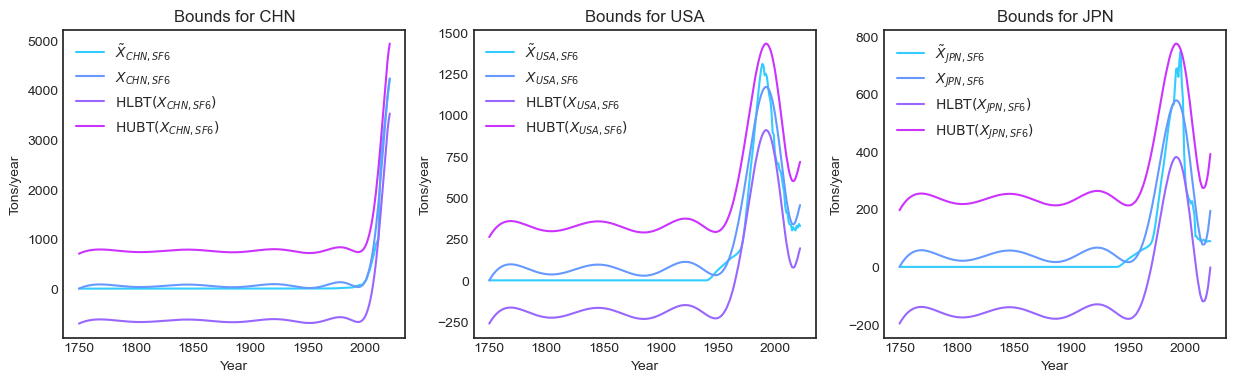

In [44]:
sf6_top.visualize(
    [
        [
            r"$\tilde{X}_{CHN, SF6}$", r"$X_{CHN, SF6}$",
            r"$\mathrm{HLBT}(X_{CHN, SF6})$", r"$\mathrm{HUBT}(X_{CHN, SF6})$"
        ],
        [
            r"$\tilde{X}_{USA, SF6}$", r"$X_{USA, SF6}$",
            r"$\mathrm{HLBT}(X_{USA, SF6}$", r"$\mathrm{HUBT}(X_{USA, SF6})$"
        ],
        [
            r"$\tilde{X}_{JPN, SF6}$", r"$X_{JPN, SF6}$",
            r"$\mathrm{HLBT}(X_{JPN, SF6})$", r"$\mathrm{HUBT}(X_{JPN, SF6})$"
        ]
    ],
    figsize= (15, 4)
)

## **References**

[1] Gütschow, J., & Pflüger, M. (2023). *The PRIMAP-hist national historical emissions time series (1750-2022) v2.5 (2.5) [Data set]*. Zenodo. DOI: https://doi.org/10.5281/zenodo.10006301